In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CS412_Project/german_credit_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


We see that there are 183 null elements for ***(Saving accounts)*** column and 394 null elements for ***(Checking account)*** column. They will be dealt with by Mean or kNN imputation.

Some other columns are in integer type, while others are string literals.

There is also a column named ***(Unnamed)***, which acts like an index method. So, we are going to remove it also.

We will be using one-hot encoding for features that is not assumed to be ordinally ordered, for example, sex.

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df['Checking account'].describe()

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object

In [ ]:
df['Saving accounts'].describe()

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

In [ ]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

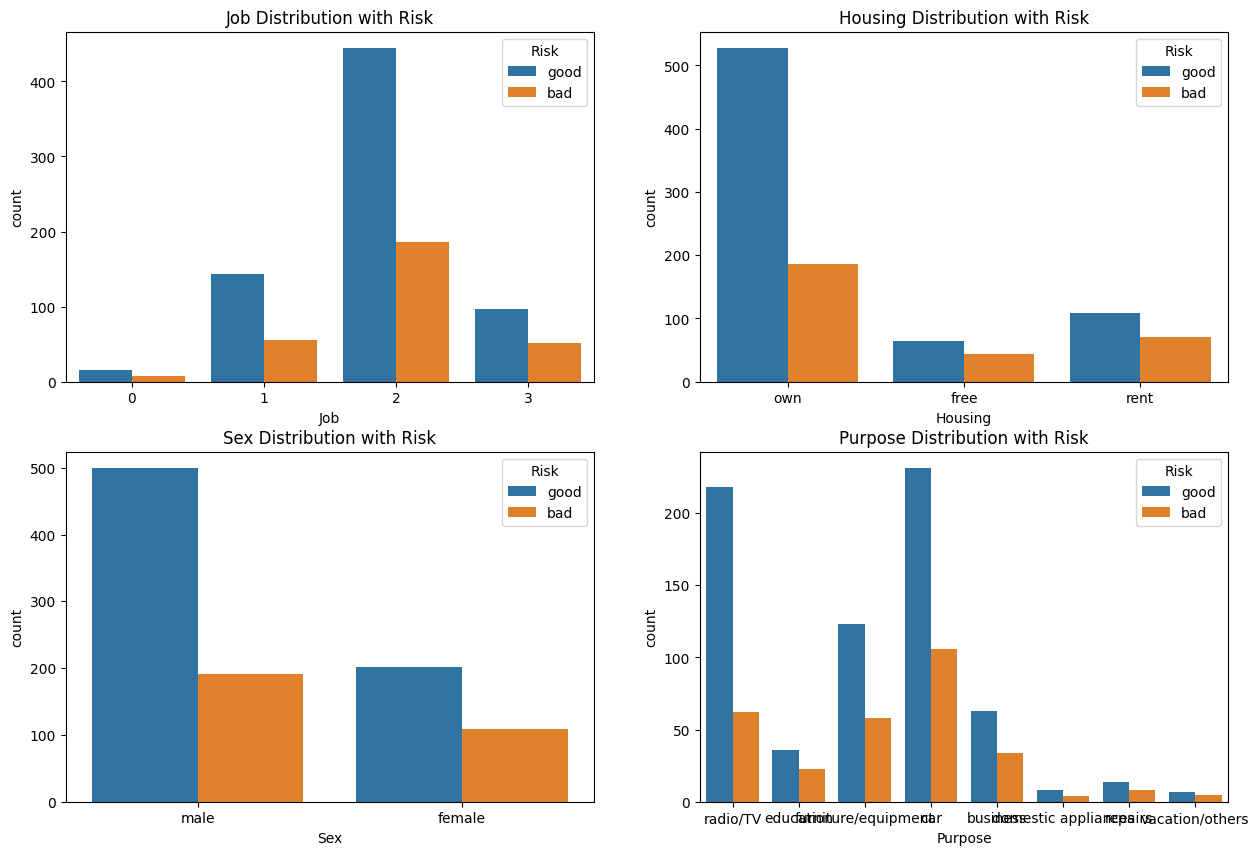

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0][0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[0][1]).set_title("Housing Distribution with Risk");
sns.countplot(data=df, x="Sex", hue='Risk', ax=ax[1][0]).set_title("Sex Distribution with Risk");
sns.countplot(data=df, x="Purpose", hue='Risk', ax=ax[1][1]).set_title("Purpose Distribution with Risk");

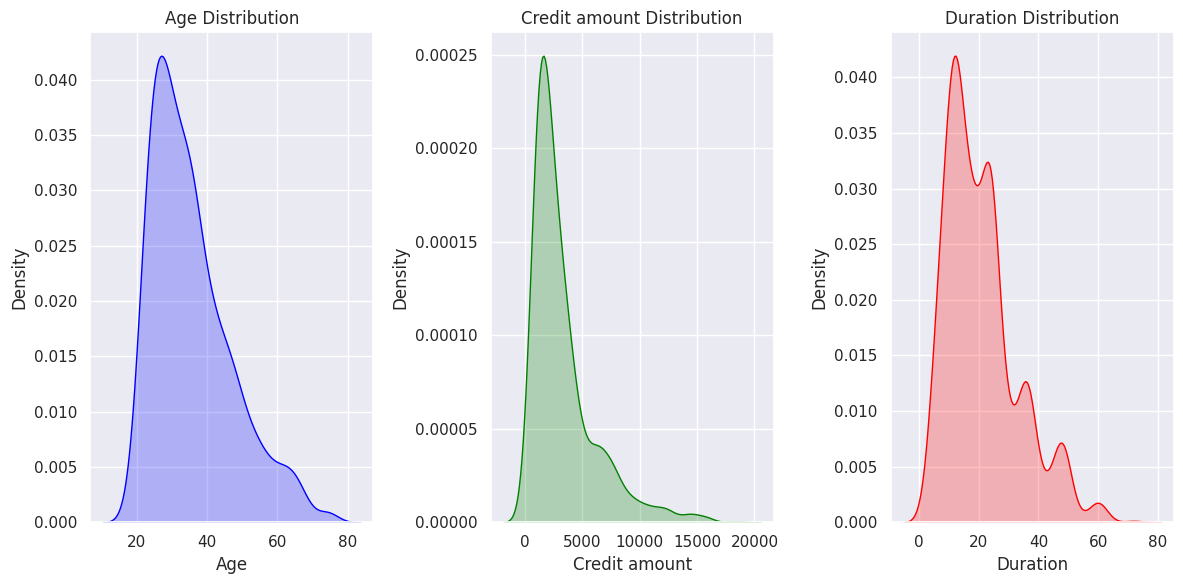

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Iterate over the columns and create KDE plots
columns = ['Age', 'Credit amount', 'Duration']
colors = ['blue', 'green', 'red']

for i, column in enumerate(columns):
    # Select the current axis
    ax = axes[i]
    
    # Generate the KDE plot for the current column
    sns.kdeplot(data=df, x=column, color=colors[i], fill=True, ax=ax)
    
    # Set title and labels for the current subplot
    ax.set_title(column + ' Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

# As seen, they are skewed to the right.
# we may use normalization for age, but not for credit amount and duration.

In [ ]:
# categorical
df = pd.get_dummies(df, columns=['Housing', 'Purpose'])
# binary
df = pd.get_dummies(df, columns=['Sex', 'Risk'], drop_first=True)
# ordinal
ordinal_mapping_checking = {'little': 1, 'moderate': 2, 'rich': 3}  # Define the mapping of categories to numerical values
df['Checking account'] = df['Checking account'].map(ordinal_mapping_checking)

ordinal_mapping_saving = {'little': 1, 'moderate': 2, 'rich': 3, 'quite rich' : 4}  # Define the mapping of categories to numerical values
df['Saving accounts'] = df['Saving accounts'].map(ordinal_mapping_saving)
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Risk_good
0,67,2,NaN,1.0,1169,6,0,1,0,0,0,0,0,0,1,0,0,1,1
1,22,2,1.0,2.0,5951,48,0,1,0,0,0,0,0,0,1,0,0,0,0
2,49,1,1.0,NaN,2096,12,0,1,0,0,0,0,1,0,0,0,0,1,1
3,45,2,1.0,1.0,7882,42,1,0,0,0,0,0,0,1,0,0,0,1,1
4,53,2,1.0,1.0,4870,24,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = list(df.columns)
numeric_cols.remove('Risk_good')

scaler = StandardScaler()

# Fit the scaler on the numeric data and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()
# Observe

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Risk_good
0,2.766456,0.146949,NaN,-0.988424,-0.745131,-1.236478,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,0.670280,1
1,-1.191404,0.146949,-0.521423,0.527994,0.949817,2.248194,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-1.491914,0
2,1.183312,-1.383771,-0.521423,NaN,-0.416562,-0.738668,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,1
3,0.831502,0.146949,-0.521423,-0.988424,1.634247,1.750384,2.873893,-1.576173,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,0.670280,1
4,1.535122,0.146949,-0.521423,-0.988424,0.566664,0.256953,2.873893,-1.576173,-0.466933,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Saving accounts'] = imputer.fit_transform(df['Saving accounts'].values.reshape(-1,1))
df['Checking account'] = imputer.fit_transform(df['Checking account'].values.reshape(-1,1))
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Risk_good
0,2.766456,0.146949,-0.521423,-0.988424,-0.745131,-1.236478,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,0.670280,1
1,-1.191404,0.146949,-0.521423,0.527994,0.949817,2.248194,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-1.491914,0
2,1.183312,-1.383771,-0.521423,-0.988424,-0.416562,-0.738668,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,1
3,0.831502,0.146949,-0.521423,-0.988424,1.634247,1.750384,2.873893,-1.576173,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,0.670280,1
4,1.535122,0.146949,-0.521423,-0.988424,0.566664,0.256953,2.873893,-1.576173,-0.466933,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,0


In [ ]:
# Impute for the null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Saving accounts'] = imputer.fit_transform(df['Saving accounts'].values.reshape(-1,1))
df['Checking account'] = imputer.fit_transform(df['Checking account'].values.reshape(-1,1))
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,log_credit_amount,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Risk_good
0,2.766456,0.146949,-8.696974e-18,-9.884240e-01,-0.745131,-1.236478,-0.933901,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,0.670280,1
1,-1.191404,0.146949,-5.214234e-01,5.279936e-01,0.949817,2.248194,1.163046,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-1.491914,0
2,1.183312,-1.383771,-5.214234e-01,-1.172513e-16,-0.416562,-0.738668,-0.181559,-0.347960,0.634448,-0.466933,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,1
3,0.831502,0.146949,-5.214234e-01,-9.884240e-01,1.634247,1.750384,1.525148,2.873893,-1.576173,-0.466933,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,0.670280,1
4,1.535122,0.146949,-5.214234e-01,-9.884240e-01,0.566664,0.256953,0.904743,2.873893,-1.576173,-0.466933,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,0.670280,0


In [ ]:
# Define the target variable
target_variable = 'Risk_good'

# Calculate the correlation between each feature and the target variable
correlations = df.drop(columns=target_variable).corrwith(df[target_variable])

# Identify the independent variables (with low correlation values)
threshold = 0.05  # Define a threshold for correlation value
independent_variables = correlations[abs(correlations) < threshold].index

# Use the independent variables for further analysis or machine learning
df_independent = df[independent_variables]

# Print the independent variables dataframe
print(df_independent.columns)

Index(['Job', 'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


<ipython-input-8-84d66f4e082d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


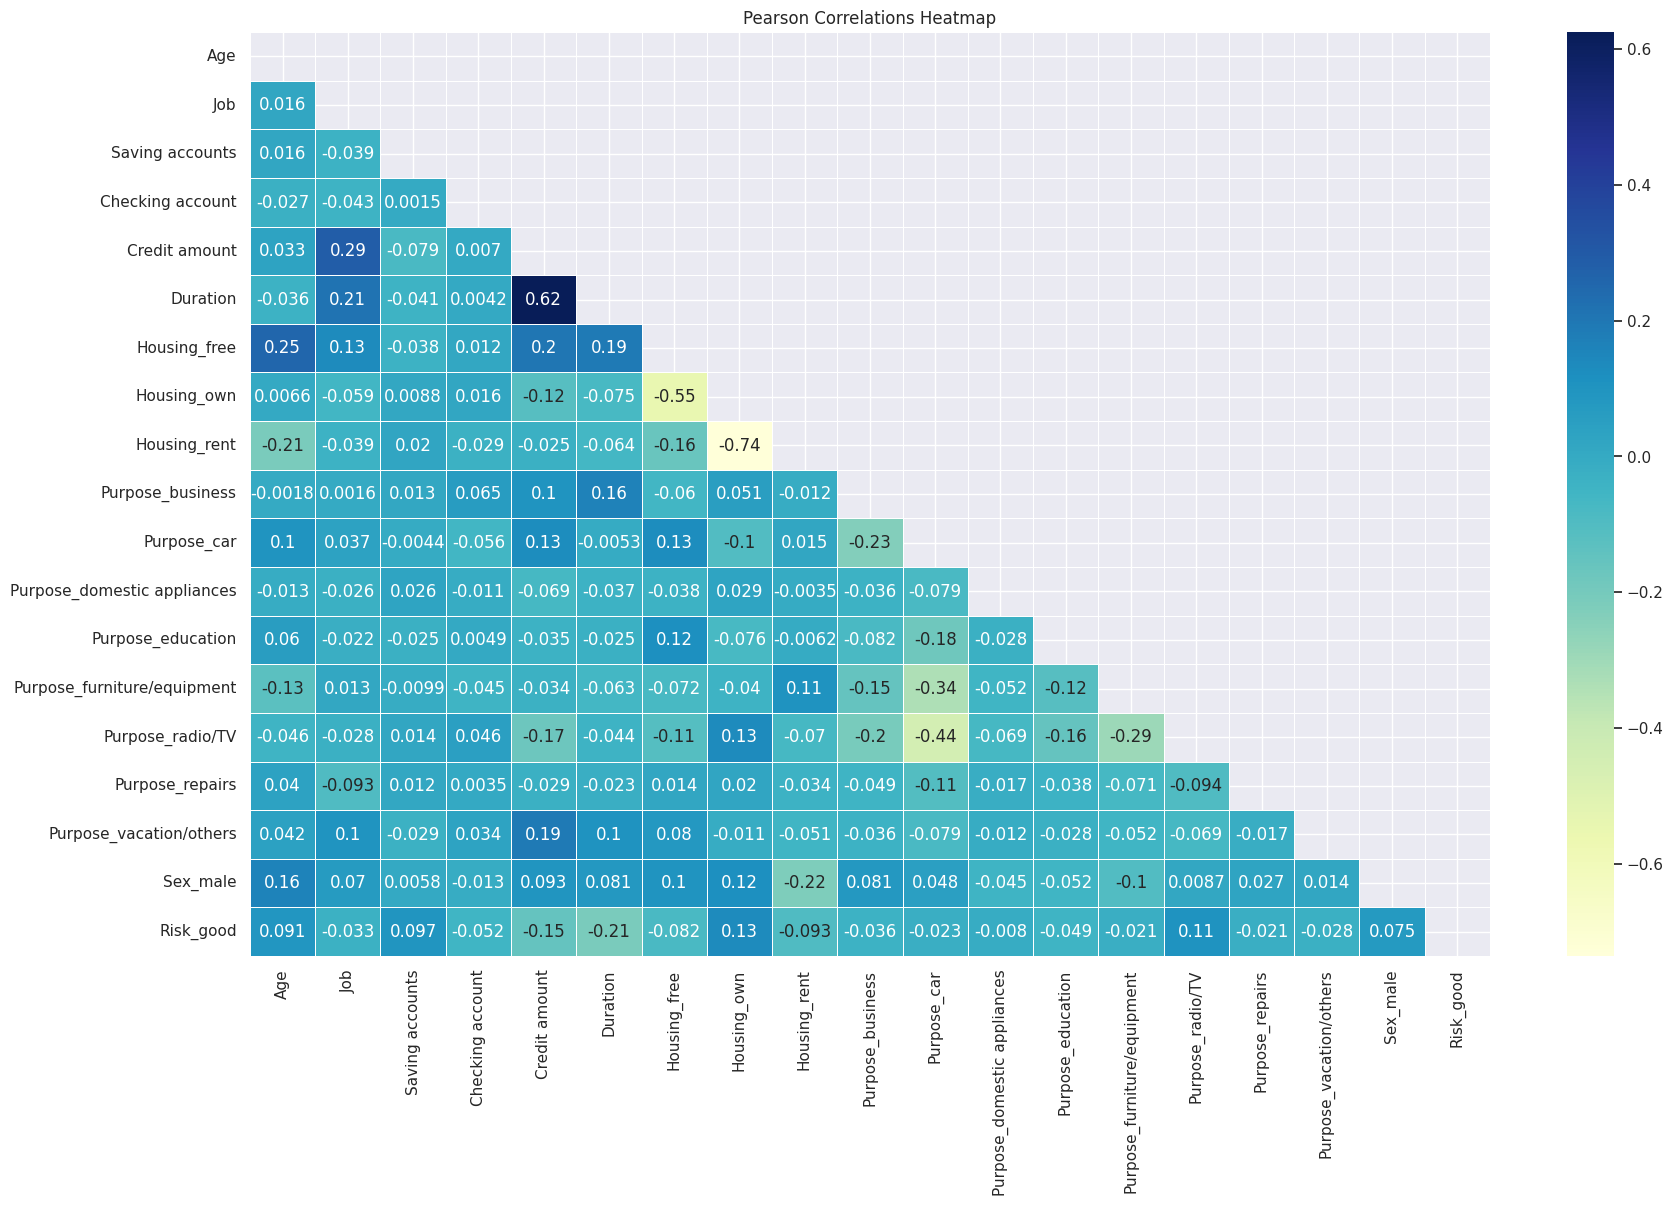

In [ ]:
corr = df.corr()
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [ ]:
from sklearn.model_selection import train_test_split

df_for_kNN = df.copy()
y = df_for_kNN['Risk_good']
X = df_for_kNN.drop(columns=['Risk_good', 'Housing_rent', 'Housing_free'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

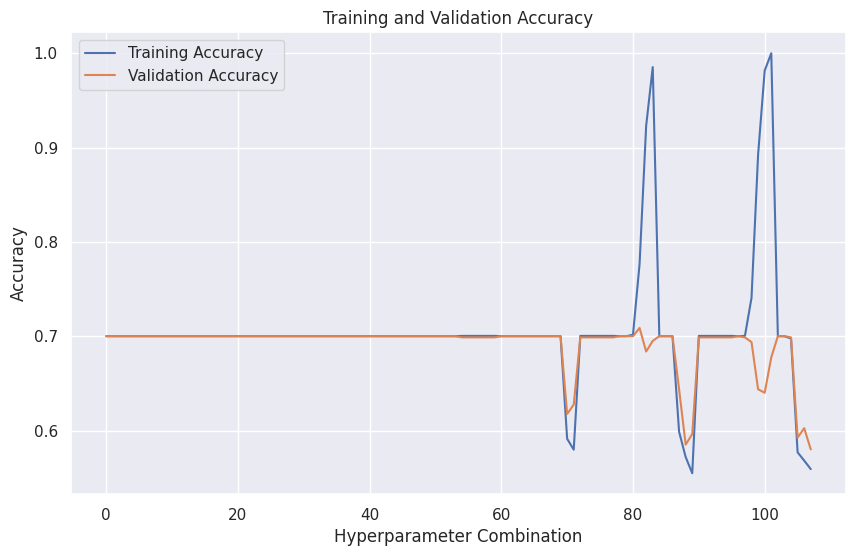

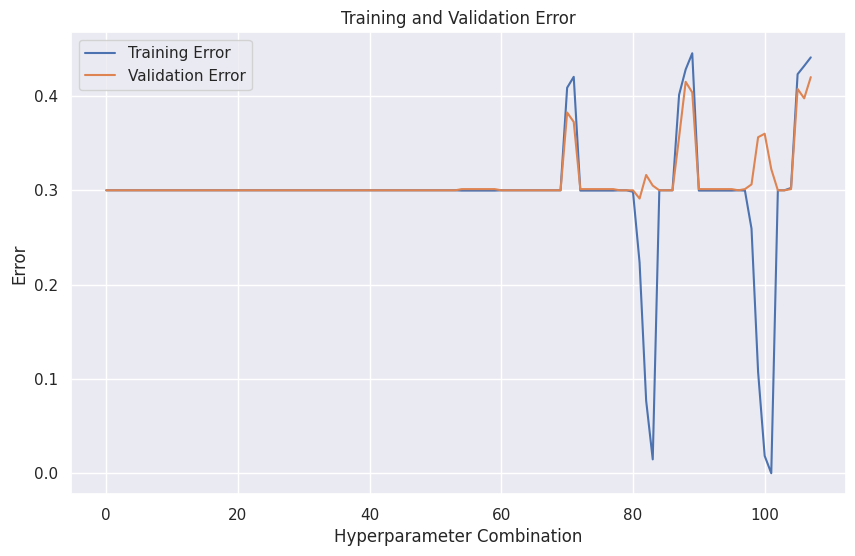

0.70875 1 rbf 0.1


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score




Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['linear', 'rbf', 'sigmoid']
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
best_score = -1
best_c = -1
best_kernel = None
best_gamma = -1
kf = KFold(n_splits=5)

train_acc_values = []
val_acc_values = []
train_err_values = []
val_err_values = []


for c in Cs:
  for kernel in kernels:
    for gamma in gammas:
      val_acc_fold = []
      train_acc_fold = []
      train_err_fold = []
      val_err_fold = []
      for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model = SVC(C=c, kernel=kernel, gamma=gamma)
            # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)

            # Evaluate the model on the validation fold
        y_pred = model.predict(X_val_fold)
        # Evaluate the model on the training fold
        y_train_pred = model.predict(X_train_fold)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        train_err = 1 - train_acc
                
                # Evaluate the model on the validation fold
        y_val_pred = model.predict(X_val_fold)
        val_acc = accuracy_score(y_val_fold, y_val_pred)
        val_err = 1 - val_acc
                
        # Append accuracy and error values to the lists
        train_acc_fold.append(train_acc)
        val_acc_fold.append(val_acc)
        train_err_fold.append(train_err)
        val_err_fold.append(val_err)


      mean_train_acc = np.mean(train_acc_fold)
      mean_train_err = np.mean(train_err_fold)
      mean_val_err = np.mean(val_err_fold)
      mean_val_acc = np.mean(val_acc_fold)

        # Append mean accuracy values to the lists
      train_acc_values.append(mean_train_acc)
      val_acc_values.append(mean_val_acc)
      train_err_values.append(mean_train_err)
      val_err_values.append(mean_val_err)
      if mean_val_acc > best_score:
        best_score = mean_val_acc
        best_c = c
        best_kernel = kernel
        best_gamma = gamma
      

train_acc_values = np.array(train_acc_values)
val_acc_values = np.array(val_acc_values)
train_err_values = np.array(train_err_values)
val_err_values = np.array(val_err_values)

# Create x-axis values for the plots
x_values = np.arange(len(train_acc_values))

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_acc_values, label='Training Accuracy')
plt.plot(x_values, val_acc_values, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation error
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_err_values, label='Training Error')
plt.plot(x_values, val_err_values, label='Validation Error')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

print(best_score, best_c, best_kernel, best_gamma)

0.7


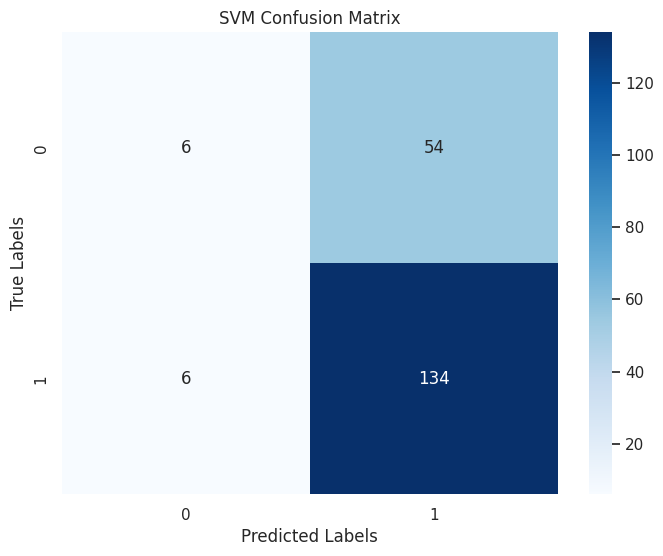

In [ ]:
model = SVC(C=1, gamma=0.1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
class_names = np.unique(y_test)  # Unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()

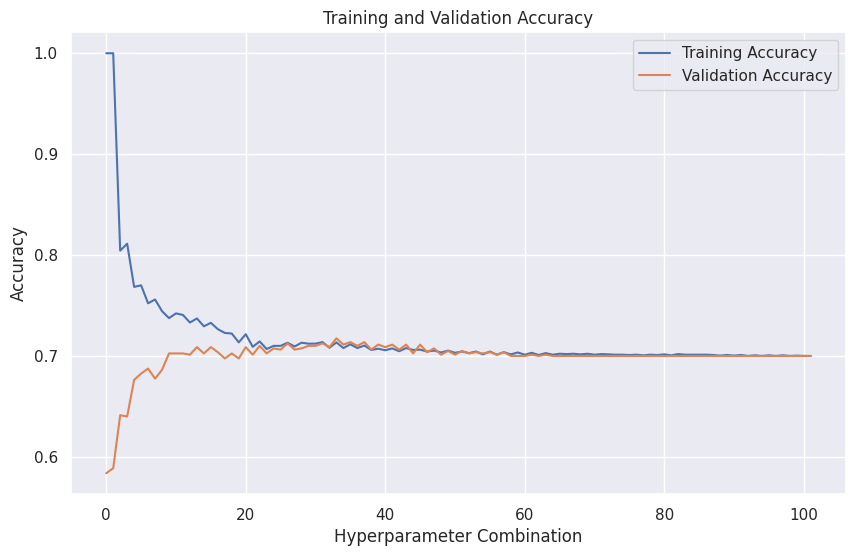

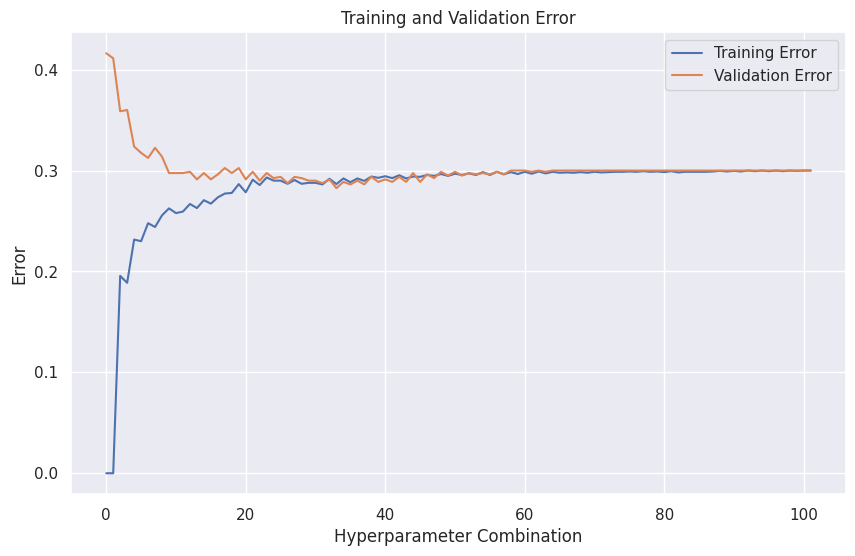

Best k is 33 , best metric is manhattan , best accuracy is 0.7174999999999999


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
best_accuracy = -1
distance_metric = ['euclidean', 'manhattan']
best_k = 0
best_metric = None
train_acc_values = []
val_acc_values = []
train_err_values = []
val_err_values = []


for k in range(1, 102, 2):
    for metric in distance_metric:
        # Initialize lists to store fold accuracy values
        fold_train_acc = []
        fold_val_acc = []
        fold_val_err = []
        fold_train_err = []


        # Iterate over the folds
        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
            # Fit the model on the training fold
            model.fit(X_train_fold, y_train_fold)

            # Evaluate the model on the training fold
            y_train_pred = model.predict(X_train_fold)
            train_acc = accuracy_score(y_train_fold, y_train_pred)
            train_err = 1 - train_acc
            fold_train_acc.append(train_acc)
            fold_train_err.append(train_err)

            # Evaluate the model on the validation fold
            y_val_pred = model.predict(X_val_fold)
            val_acc = accuracy_score(y_val_fold, y_val_pred)
            val_err = 1 - val_acc
            fold_val_acc.append(val_acc)
            fold_val_err.append(val_err)

        # Calculate the mean accuracy across folds
        mean_train_acc = np.mean(fold_train_acc)
        mean_val_acc = np.mean(fold_val_acc)
        mean_val_err = np.mean(fold_val_err)
        mean_train_err = np.mean(fold_train_err)
        if mean_val_acc > best_accuracy:
          best_accuracy = mean_val_acc
          best_k = k
          best_metric = metric

        # Append mean accuracy values to the lists
        train_acc_values.append(mean_train_acc)
        val_acc_values.append(mean_val_acc)
        train_err_values.append(mean_train_err)
        val_err_values.append(mean_val_err)


# Convert the accuracy lists to numpy arrays
train_acc_values = np.array(train_acc_values)
val_acc_values = np.array(val_acc_values)
train_err_values = np.array(train_err_values)
val_err_values = np.array(val_err_values)

# Create x-axis values for the plots
x_values = np.arange(len(train_acc_values))

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_acc_values, label='Training Accuracy')
plt.plot(x_values, val_acc_values, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation error
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_err_values, label='Training Error')
plt.plot(x_values, val_err_values, label='Validation Error')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

print("Best k is", best_k, ", best metric is", best_metric, ", best accuracy is", best_accuracy)

Using the values found during tuning, the test accuracy is 0.69


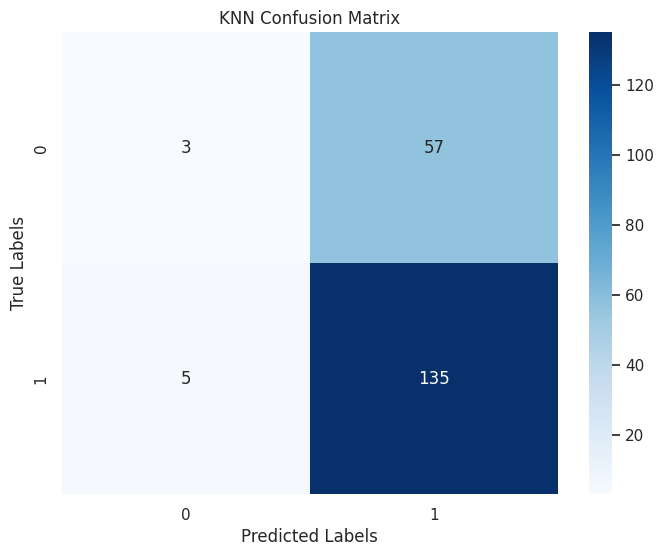

In [ ]:
model = KNeighborsClassifier(n_neighbors=33, metric='manhattan')
model.fit(X_train, y_train)
print("Using the values found during tuning, the test accuracy is", model.score(X_test, y_test))
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
class_names = np.unique(y_test)  # Unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.show()

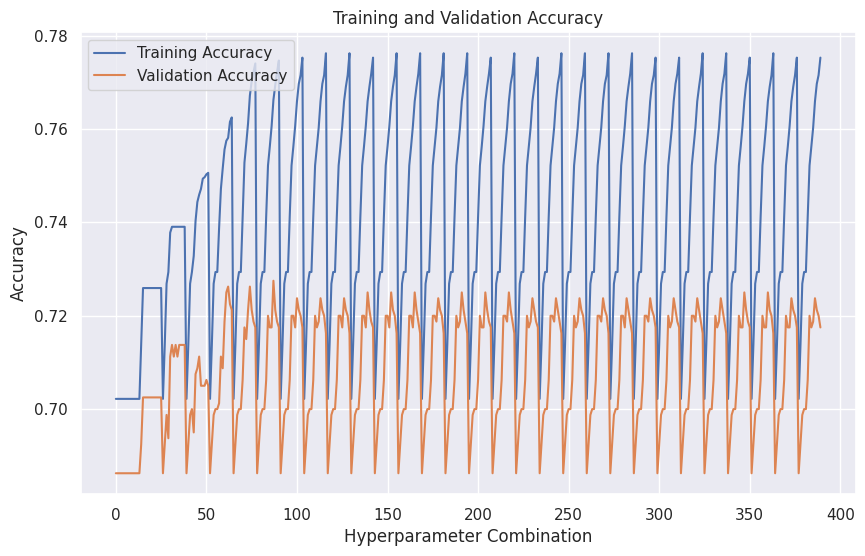

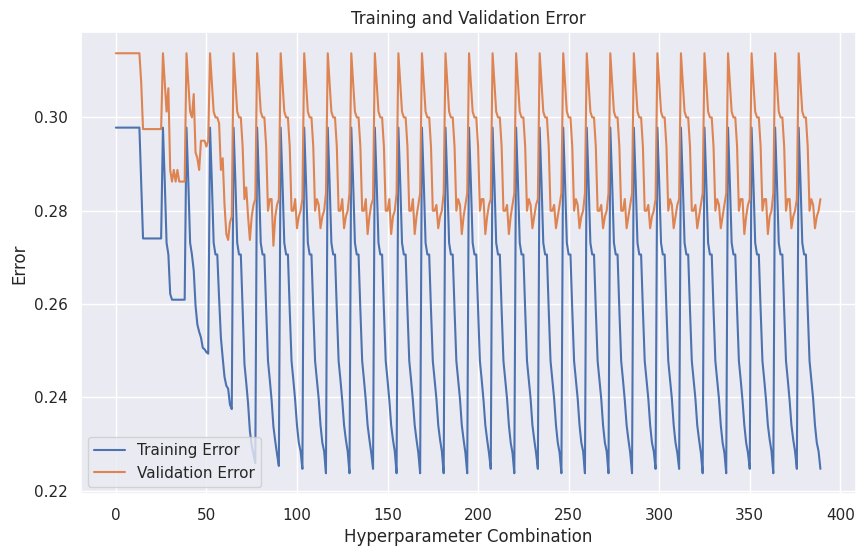

Best score is 0.7274999999999999 while best_max_depth is 7 and best_max_leaf_nodes is 11


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold


kf = KFold(n_splits=5)


best_score = 0
best_max_depth = 0
best_max_leaf_nodes = 0


train_acc_values = []
val_acc_values = []
train_err_values = []
val_err_values = []


for i in range(1, 31):
  for j in range(2, 15):
    
    fold_train_acc = []
    fold_val_acc = []
    fold_val_err = []
    fold_train_err = []

    for train_index, val_index in kf.split(X_train):
      X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
      y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
      # Fit the model on the training fold
      model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=j)
      model.fit(X_train_fold, y_train_fold)
      y_train_pred = model.predict(X_train_fold)
      train_acc = accuracy_score(y_train_fold, y_train_pred)
      train_err = 1 - train_acc
      fold_train_acc.append(train_acc)
      fold_train_err.append(train_err)

      # Evaluate the model on the validation fold
      y_val_pred = model.predict(X_val_fold)
      val_acc = accuracy_score(y_val_fold, y_val_pred)
      val_err = 1 - val_acc
      fold_val_acc.append(val_acc)
      fold_val_err.append(val_err)

 
    mean_train_acc = np.mean(fold_train_acc)
    mean_train_err = np.mean(fold_train_err)
    mean_val_err = np.mean(fold_val_err)
    mean_val_acc = np.mean(fold_val_acc)

        # Append mean accuracy values to the lists
    train_acc_values.append(mean_train_acc)
    val_acc_values.append(mean_val_acc)
    train_err_values.append(mean_train_err)
    val_err_values.append(mean_val_err)
    if mean_val_acc > best_score:
      best_score = mean_val_acc
      best_max_depth = i
      best_max_leaf_nodes = j


train_acc_values = np.array(train_acc_values)
val_acc_values = np.array(val_acc_values)
train_err_values = np.array(train_err_values)
val_err_values = np.array(val_err_values)

# Create x-axis values for the plots
x_values = np.arange(len(train_acc_values))

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_acc_values, label='Training Accuracy')
plt.plot(x_values, val_acc_values, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation error
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_err_values, label='Training Error')
plt.plot(x_values, val_err_values, label='Validation Error')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

print('Best score is' , best_score, 'while best_max_depth is', best_max_depth, 'and best_max_leaf_nodes is', best_max_leaf_nodes)

Accuracy score is 0.7


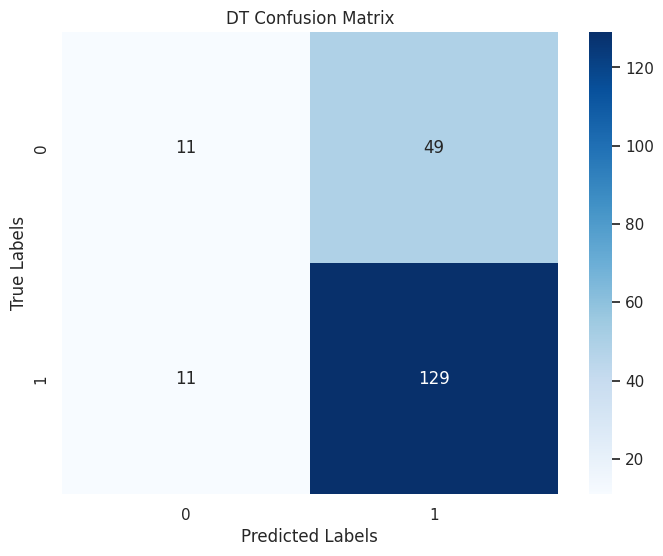

In [ ]:
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=11)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
class_names = np.unique(y_test)  # Unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("DT Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

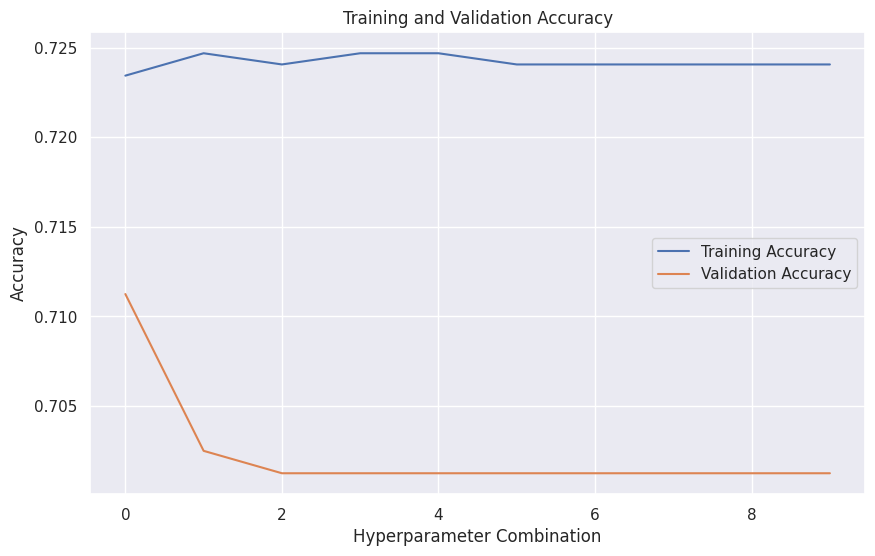

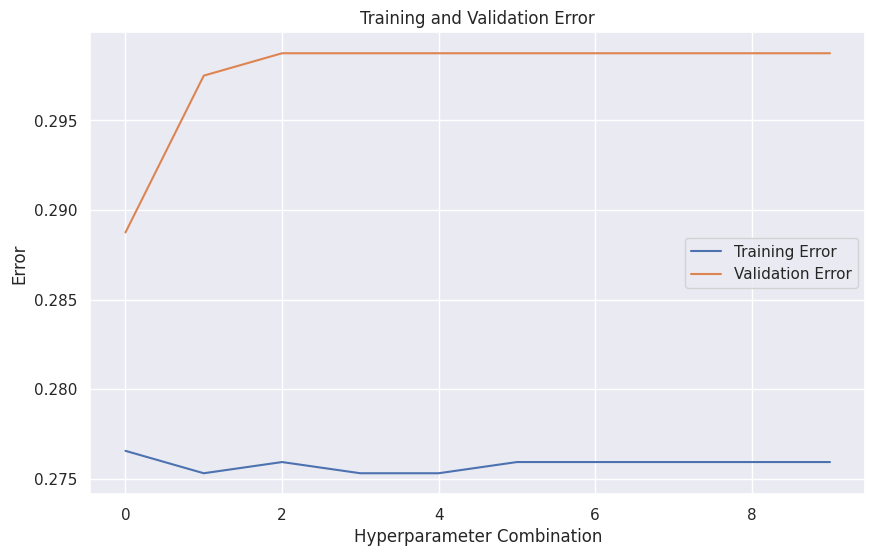

Best score is 0.7112499999999999 while best cutoff value is 0.1 and the best penalty is l2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold



# Define the hyperparameters to tune
penalties = ['l2', None]
C_values = [0.1,0.4, 0.6, 0.8, 1]


kf = KFold(n_splits=5)


best_score = 0
best_c = -1
best_penalty = None


train_acc_values = []
val_acc_values = []
train_err_values = []
val_err_values = []


for penalty in penalties:
  for c in C_values:
    
    fold_train_acc = []
    fold_val_acc = []
    fold_val_err = []
    fold_train_err = []

    for train_index, val_index in kf.split(X_train):
      X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
      y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
      # Fit the model on the training fold
      model = LogisticRegression(C=c, penalty=penalty)
      model.fit(X_train_fold, y_train_fold)
      y_train_pred = model.predict(X_train_fold)
      train_acc = accuracy_score(y_train_fold, y_train_pred)
      train_err = 1 - train_acc
      fold_train_acc.append(train_acc)
      fold_train_err.append(train_err)

      # Evaluate the model on the validation fold
      y_val_pred = model.predict(X_val_fold)
      val_acc = accuracy_score(y_val_fold, y_val_pred)
      val_err = 1 - val_acc
      fold_val_acc.append(val_acc)
      fold_val_err.append(val_err)

 
    mean_train_acc = np.mean(fold_train_acc)
    mean_train_err = np.mean(fold_train_err)
    mean_val_err = np.mean(fold_val_err)
    mean_val_acc = np.mean(fold_val_acc)

        # Append mean accuracy values to the lists
    train_acc_values.append(mean_train_acc)
    val_acc_values.append(mean_val_acc)
    train_err_values.append(mean_train_err)
    val_err_values.append(mean_val_err)
    if mean_val_acc > best_score:
      best_score = mean_val_acc
      best_penalty = penalty
      best_c = c


train_acc_values = np.array(train_acc_values)
val_acc_values = np.array(val_acc_values)
train_err_values = np.array(train_err_values)
val_err_values = np.array(val_err_values)

# Create x-axis values for the plots
x_values = np.arange(len(train_acc_values))

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_acc_values, label='Training Accuracy')
plt.plot(x_values, val_acc_values, label='Validation Accuracy')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation error
plt.figure(figsize=(10, 6))
plt.plot(x_values, train_err_values, label='Training Error')
plt.plot(x_values, val_err_values, label='Validation Error')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

print('Best score is' , best_score, 'while best cutoff value is', best_c, 'and the best penalty is', best_penalty)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k=9)

X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]
# Drop the non-selected columns from X_train
X_train_selected = X_train.iloc[:, selected_feature_indices]

# Drop the non-selected columns from X_test
X_test_selected = X_test.iloc[:, selected_feature_indices]

model = SVC(C=1, kernel='rbf', gamma=0.1)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print("Accuracy score for a SVM machine, built with the found parameters is ",accuracy_score(y_test, y_pred))
model_2 = KNeighborsClassifier(n_neighbors=33, metric='manhattan')
model_2.fit(X_train_selected, y_train)
y_pred_2 = model_2.predict(X_test_selected)
print("Accuracy score for a KNN machine, built with the found parameters is ",accuracy_score(y_test, y_pred_2))
model_3 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=11)
model_3.fit(X_train_selected, y_train)
y_pred_3 = model_3.predict(X_test_selected)
print("Accuracy score for a DT machine, built with the found parameters is ",accuracy_score(y_test, y_pred_3))

model_4 = LogisticRegression(C=0.1, penalty='l2')
model_4.fit(X_train_selected, y_train)
y_pred_4 = model_4.predict(X_test_selected)
print("Accuracy score for a Logistic Regressor machine, built with the found parameters is ",accuracy_score(y_test, y_pred_4))


Accuracy score for a SVM machine, built with the found parameters is  0.73
Accuracy score for a KNN machine, built with the found parameters is  0.71
Accuracy score for a DT machine, built with the found parameters is  0.7
Accuracy score for a Logistic Regressor machine, built with the found parameters is  0.7


Accuracy score is 0.7


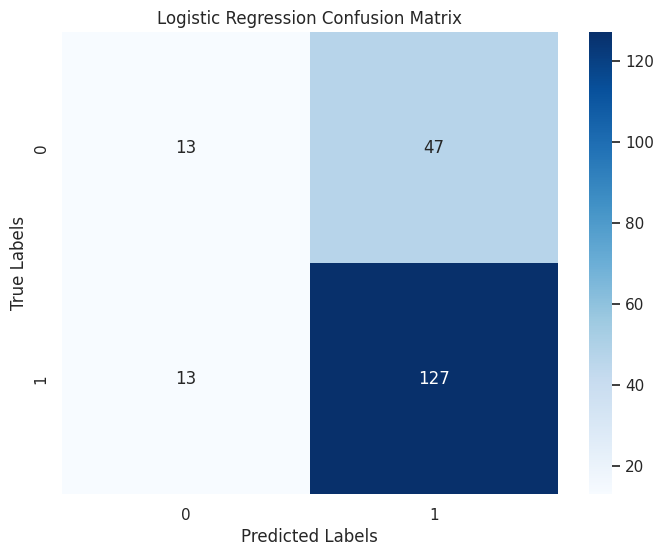

In [ ]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy score is", accuracy_score(y_test, y_pred))
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
class_names = np.unique(y_test)  # Unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()